#TASK #1: PROBLEM STATEMENT AND PROJECT OVERVIEW

![alt text](https://drive.google.com/uc?id=1qOZKOEs_N-SbkO2vqlsxpXfHAqjZLw1p)

#TASK #2: IMPORT DATASETS AND LIBRARIES

In [2]:
# Mount the drive
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from copy import copy
from scipy import stats
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go

In [4]:
stocks_df = pd.read_csv('stock.csv')
stocks_df

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,60.198570,75.510002,30.120001,12.130000,175.929993,180.550003,28.250000,313.644379,1295.500000
1,2012-01-13,59.972858,74.599998,30.070000,12.350000,178.419998,179.160004,22.790001,311.328064,1289.089966
2,2012-01-17,60.671429,75.239998,30.250000,12.250000,181.660004,180.000000,26.600000,313.116364,1293.670044
3,2012-01-18,61.301430,75.059998,30.330000,12.730000,189.440002,181.070007,26.809999,315.273285,1308.040039
4,2012-01-19,61.107143,75.559998,30.420000,12.800000,194.449997,180.520004,26.760000,318.590851,1314.500000
...,...,...,...,...,...,...,...,...,...,...
2154,2020-08-05,440.250000,174.279999,29.850000,16.719999,3205.030029,125.449997,1485.020020,1473.609985,3327.770020
2155,2020-08-06,455.609985,172.199997,29.840000,18.459999,3225.000000,126.120003,1489.579956,1500.099976,3349.159912
2156,2020-08-07,444.450012,170.020004,30.020000,19.030001,3167.459961,124.959999,1452.709961,1494.489990,3351.280029
2157,2020-08-10,450.910004,179.410004,30.200001,21.650000,3148.159912,127.110001,1418.569946,1496.099976,3360.469971


In [5]:
# Read the stock data csv file, here's the list of the stocks considered:


# AAPL = Apple Stock 
# BA = Boeing 
# T = AT&T
# MGM = MGM Resorts International (Hotel Industry)
# AMZN = Amazon
# IBM = IBM
# TSLA = Tesla Motors
# GOOG = Google 
# sp500 = US Stock Market (S&P 500 is a stock market index that measures the stock performance of 500 large companies listed on U.S. stock exchange)
# Check the list of S&P 500 companies here: https://en.wikipedia.org/wiki/List_of_S%26P_500_companies



In [6]:
# Sort the stock data by date
stocks_df = stocks_df.sort_values(by = ['Date'])
stocks_df

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,60.198570,75.510002,30.120001,12.130000,175.929993,180.550003,28.250000,313.644379,1295.500000
1,2012-01-13,59.972858,74.599998,30.070000,12.350000,178.419998,179.160004,22.790001,311.328064,1289.089966
2,2012-01-17,60.671429,75.239998,30.250000,12.250000,181.660004,180.000000,26.600000,313.116364,1293.670044
3,2012-01-18,61.301430,75.059998,30.330000,12.730000,189.440002,181.070007,26.809999,315.273285,1308.040039
4,2012-01-19,61.107143,75.559998,30.420000,12.800000,194.449997,180.520004,26.760000,318.590851,1314.500000
...,...,...,...,...,...,...,...,...,...,...
2154,2020-08-05,440.250000,174.279999,29.850000,16.719999,3205.030029,125.449997,1485.020020,1473.609985,3327.770020
2155,2020-08-06,455.609985,172.199997,29.840000,18.459999,3225.000000,126.120003,1489.579956,1500.099976,3349.159912
2156,2020-08-07,444.450012,170.020004,30.020000,19.030001,3167.459961,124.959999,1452.709961,1494.489990,3351.280029
2157,2020-08-10,450.910004,179.410004,30.200001,21.650000,3148.159912,127.110001,1418.569946,1496.099976,3360.469971


In [7]:
# Print out the number of stocks

print('Total number of stocks: {}'.format(len(stocks_df.columns[1:])))

Total number of stocks: 9


In [8]:
# Print the name of stocks
print('Stocks under consideration:')
for i in stocks_df.columns[1:]:
    print(i)

Stocks under consideration:
AAPL
BA
T
MGM
AMZN
IBM
TSLA
GOOG
sp500


**MINI CHALLENGE #1:** 
- **What is the average return of the S&P500?**
- **Which stock or index has the minimum dispertion from the mean in dollar value?**
- **What is the maximum price for AMZN stock over the specified time period?** 

In [9]:
print('The average returns of sp500 is ${:0,.2f}'.format(stocks_df['sp500'].mean()))
print('The stock or index with minimum dispertion (std) is: {} with a minimum dispertion of ${:0,.2f}'.format(stocks_df.std(numeric_only=True).idxmin(),stocks_df.std(numeric_only=True).min()))
print('The max price for AMZN over the specified time period was ${:0,.2f}'.format(stocks_df['AMZN'].max()))



The average returns of sp500 is $2,218.75
The stock or index with minimum dispertion (std) is: T with a minimum dispertion of $3.21
The max price for AMZN over the specified time period was $3,225.00


In [10]:
# Alternatively we can use # .describ() to call the 7 key basic box plot data points
stocks_df.describe()


,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
count,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000
mean,140.819823,189.942700,35.162899,23.105743,915.665665,161.853001,259.600815,783.712512,2218.749554
std,70.827601,103.678586,3.207490,6.963847,697.838905,25.561938,210.988003,334.448057,537.321727
min,55.790001,67.239998,26.770000,7.140000,175.929993,94.769997,22.790001,278.481171,1278.040039
25%,89.165714,124.015000,33.040001,18.545000,316.490005,142.769997,184.595001,527.214416,1847.984985
50%,116.599998,142.419998,34.930000,23.780001,676.010010,156.949997,231.960007,737.599976,2106.629883
75%,175.019997,297.044998,37.419998,28.430000,1593.645019,185.974998,307.350006,1079.744995,2705.810059
max,455.609985,440.619995,43.470001,38.029999,3225.000000,215.800003,1643.000000,1568.489990,3386.149902


# TASK #3: PERFORM EXPLORATORY DATA ANALYSIS AND VISUALIZATION

In [31]:
# Check if data contains any null values
pd.isnull(stocks_df)

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
2154,False,False,False,False,False,False,False,False,False,False
2155,False,False,False,False,False,False,False,False,False,False
2156,False,False,False,False,False,False,False,False,False,False
2157,False,False,False,False,False,False,False,False,False,False


In [12]:
# Getting dataframe info


In [13]:
# Define a function to plot the entire dataframe
# The function takes in a dataframe df as an input argument and does not return anything back!
# The function performs data visualization
# Pandas works great with matplotlib, you can simply plot data directly from a Pandas DataFrame using plot() method


In [14]:
# Plot the data


**MINI CHALLENGE #2:**
- **Print out normalized (scaled) stock prices**  


# TASK #4: PERFORM INTERACTIVE DATA VISUALIZATION

In [15]:
# Function to perform an interactive data plotting using plotly express
# Plotly.express module which is imported as px includes functions that can plot interactive plots easily and effectively. 
# Every Plotly Express function uses graph objects internally and returns a plotly.graph_objects.Figure instance. 


In [16]:
# Plot interactive chart


**MINI CHALLENGE #3:**
- **Plot normalized stock data in an interactive way**
- **It seems that most stocks experienced massive drops in 2020, let's assume that you own 100 shares of the S&P500 and you bought them on Feb 19th, 2020. How much did you lose (in $) by March 23rd, 2020?**


# TASK #5: CALCULATE INDIVIDUAL STOCKS DAILY RETURNS

In [17]:
# Let's calculate daily return for a single security
# Let's take the S&P500 as an example first


**MINI CHALLENGE #4:**
- **Calculate the daily return for Amazon stock.**


# TASK #6: CALCULATE MULTIPLE STOCKS DAILY RETURNS

In [18]:
# Let's define a function to calculate stocks daily returns (for all stocks) 


In [19]:
# Get the daily returns 


**MINI CHALLENGE #5:**
- **Plot the returns vs. time using both static and interactive plots**
- **What is the maximum daily return in % values**

# TASK #7: CALCULATE THE CORRELATIONS BETWEEN DAILY RETURNS 

In [20]:
# Daily Return Correlation


**MINI CHALLENGE #6:**
- **What are the top 2 stocks that are positively correlated with the S&P500?**
- **What is the correlation between Amazon and Boeing? Comment on your answer**
- **What is the correlation between MGM and Boeing? Comment on your answer**

# TASK #8: PLOT THE HISTOGRAM FOR DAILY RETURNS

In [21]:
# Histogram of daily returns
# Stock returns are normally distributed with zero mean 
# Notice how Tesla Standard deviation is high indicating a more volatile stock


**MINI CHALLENGE #7:**
- **Based on the histogram, which of the following stocks are more risky? T or TSLA**

In [22]:
# Group all data returns together in a list
# Make a copy of the daily returns dataframe


In [23]:
# Plotly's Python API contains a super pwerful module known as figure factory module 
# Figure factory module includes wrapper functions that create unique chart types such as interactive subplots 
# Check this out for more information: https://plotly.com/python/figure-factory-subplots/
# Notice how Boeing, Tesla and MGM gains are losses are sometimes extreme! This will indicate a more risky investment and will be quantified later using Sharpe Ratio


# EXCELLENT JOB!

# **MINI CHALLENGE SOLUTIONS**

**MINI CHALLENGE #1 SOLUTION:** 
- **What is the average return of the S&P500?**
- **What is the maximum price for AMZN stock over the specified time period?** 

In [24]:
# Get the mean values
stocks_df.mean()

C:\Users\Owner\AppData\Local\Temp\ipykernel_24324\2508006156.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  stocks_df.mean()


AAPL      140.819823
BA        189.942700
T          35.162899
MGM        23.105743
AMZN      915.665665
IBM       161.853001
TSLA      259.600815
GOOG      783.712512
sp500    2218.749554
dtype: float64

In [25]:
# Get the standard deviation of stocks (Volatility)
stocks_df.std()

C:\Users\Owner\AppData\Local\Temp\ipykernel_24324\3451822016.py:2: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  stocks_df.std()


AAPL      70.827601
BA       103.678586
T          3.207490
MGM        6.963847
AMZN     697.838905
IBM       25.561938
TSLA     210.988003
GOOG     334.448057
sp500    537.321727
dtype: float64

In [26]:
# Statistical data of the dataframe
stocks_df.describe()

,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
count,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000,2159.000000
mean,140.819823,189.942700,35.162899,23.105743,915.665665,161.853001,259.600815,783.712512,2218.749554
std,70.827601,103.678586,3.207490,6.963847,697.838905,25.561938,210.988003,334.448057,537.321727
min,55.790001,67.239998,26.770000,7.140000,175.929993,94.769997,22.790001,278.481171,1278.040039
25%,89.165714,124.015000,33.040001,18.545000,316.490005,142.769997,184.595001,527.214416,1847.984985
50%,116.599998,142.419998,34.930000,23.780001,676.010010,156.949997,231.960007,737.599976,2106.629883
75%,175.019997,297.044998,37.419998,28.430000,1593.645019,185.974998,307.350006,1079.744995,2705.810059
max,455.609985,440.619995,43.470001,38.029999,3225.000000,215.800003,1643.000000,1568.489990,3386.149902


**MINI CHALLENGE #2 SOLUTION:**
- **Print out normalized (scaled) stock prices**  


In [27]:
# Function to normalize the prices based on the initial price
# The function simply divides every stock by it's price at the start date (i.e.: Date = 2012-01-12)	
def normalize(df):
  x = df.copy()

  # Loop through each stock (while ignoring time columns with index 0)
  for i in x.columns[1:]:
    x[i] = x[i]/x[i][0]
  return x

In [28]:
# Plot normalized data
# Notice the massive gains in Tesla Stock compared to Amazon (second place)
show_plot(normalize(stocks_df), 'NORMALIZED STOCK PRICES')

NameError: name 'show_plot' is not defined

**MINI CHALLENGE #3 SOLUTION:**
- **Plot normalized stock data in an interactive way**
- **It seems that most stocks experienced massive drops in 2020, let's assume that you own 100 shares of the S&P500 and you bought them on Feb 19th, 2020. How much did you lose (in $) by March 23rd, 2020?**


In [ ]:
# Plot normalized interactive chart
interactive_plot(normalize(stocks_df), 'Normalized Prices')


In [ ]:
# S&P500 dropped from $3386.15 on Feb 19th, 2020 to $2237.4 by March 23rd, 2020 
# Net loss = $3386.15 - $2237.4 = $1148.75

**MINI CHALLENGE #4 SOLUTION:**
- **Calculate the daily return for Amazon stock.**


In [ ]:
df = stocks_df['AMZN']

**MINI CHALLENGE #5 SOLUTION:**
- **Plot the returns vs. time using both static and interactive plots**
- **What is the maximum daily return in % values**

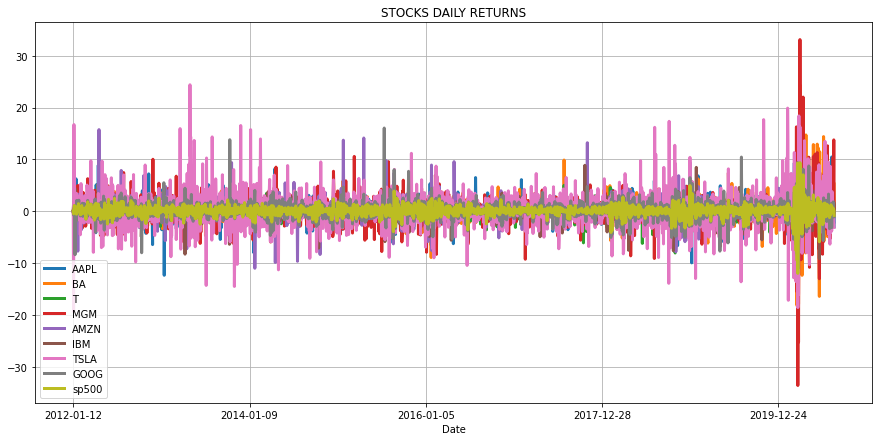

In [ ]:
# Plot the daily returns
# Notice huge drops in MGM around March 2020 (Pandemic effect)
show_plot(stocks_daily_return, 'STOCKS DAILY RETURNS')

In [ ]:
# Plot the interactive chart
# Zoom in to view the sharp decline during March 2020
interactive_plot(stocks_daily_return, 'STOCKS DAILY RETURNS')

**MINI CHALLENGE #6 SOLUTION:**
- **What are the top 2 stocks that are positively correlated with the S&P500?**
- **What is the correlation between Amazon and Boeing? Comment on your answer**
- **What is the correlation between MGM and Boeing? Comment on your answer**

In [ ]:
# Strong positive correlation between S&P500 and Google 
# Strong positive correlation between S&P500 and IBM
# Almost no correlation between Amazon and Beoing - totally different sectors
# Some correlation exists between MGM and Boeing (Hotel and Airlines)

**MINI CHALLENGE #7 SOLUTION:**
- **Based on the histogram, which of the following stocks are more risky? T or TSLA**

In [ ]:
# Tesla standard deviation is much larger compared to T indicating a more risky security